In [1]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
from pathlib import Path
from scripts.train_funcs import overfit_small_batch_testing,train,plot_training_log

In [2]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed * 13 // 7)

In [3]:
cur_dir = Path.cwd()
data_dir = cur_dir / "data"
raw_data_dir = data_dir / "raw_data"
proc_data_dir = data_dir / "processed_data"

sample_file = raw_data_dir / "sample.tsv"
train_file = proc_data_dir / "train_clean.tsv"
dev_file = raw_data_dir / "te.translit.sampled.dev.tsv"
test_file = raw_data_dir / "te.translit.sampled.test.tsv"

max_sample_file = proc_data_dir / "max_sample.tsv"
repeat_sample_file = proc_data_dir / "repeat_sample.tsv"
repeat_dev_file = proc_data_dir / "repeat_dev.tsv"
repeat_train_file = proc_data_dir / "repeat_train.tsv"
repeat_test_file = proc_data_dir / "repeat_test.tsv"

source_corpus_file = proc_data_dir / "source_corpus.txt"
target_corpus_file =  proc_data_dir / "target_corpus.txt"

storage_path = cur_dir / 'model_storage'

In [4]:
vocab_dict = {'src_corpus_file' : source_corpus_file,
              'tgt_corpus_file' : target_corpus_file,
              'src_vocab_size': 256, 
              'tgt_vocab_size' :256
             }

model_dict = {'type' : "simple_seq2seq",
              'embed_size':64,
              'hidden_size':64,
              'lr':1e-2
             }

Iteration 0, loss = 5.4274,training accuracy = 0.0
Iteration 50, loss = 4.7081,training accuracy = 0.6471
Iteration 100, loss = 3.6955,training accuracy = 0.4706
Iteration 150, loss = 2.6822,training accuracy = 0.4706
Iteration 200, loss = 2.0443,training accuracy = 0.4706
Iteration 250, loss = 1.5977,training accuracy = 0.5882
Iteration 300, loss = 1.2201,training accuracy = 0.6471
Iteration 350, loss = 0.9219,training accuracy = 0.8235
Iteration 400, loss = 0.7222,training accuracy = 0.8235
Iteration 450, loss = 0.6019,training accuracy = 0.8235
Iteration 500, loss = 0.5281,training accuracy = 0.8235
Iteration 550, loss = 0.4793,training accuracy = 0.8235
Iteration 600, loss = 0.4448,training accuracy = 0.8235
Iteration 650, loss = 0.4189,training accuracy = 0.8235
Iteration 700, loss = 0.3985,training accuracy = 0.8235
Iteration 750, loss = 0.3816,training accuracy = 0.8235
Iteration 800, loss = 0.367,training accuracy = 0.8824
Iteration 850, loss = 0.3538,training accuracy = 0.8824

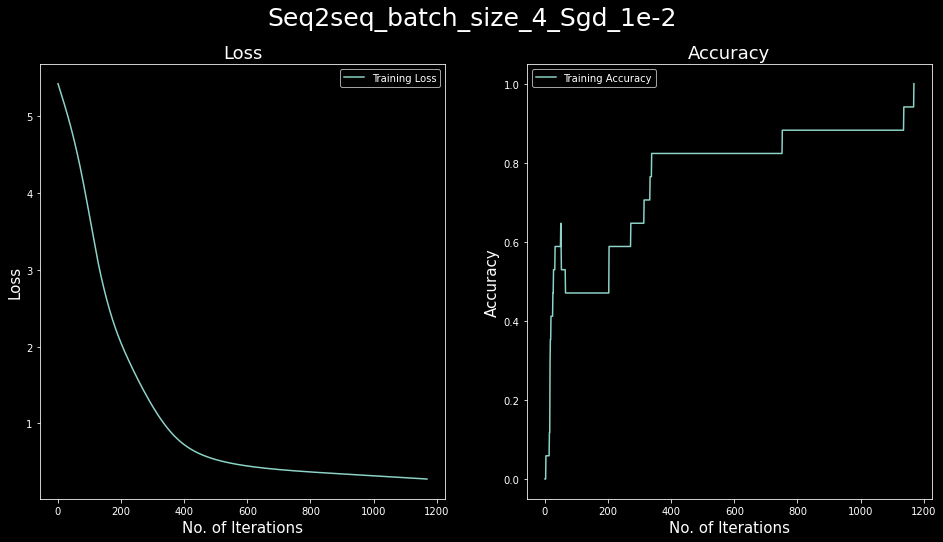

In [5]:
overfit_small_batch_testing(vocab_dict,max_sample_file,model_dict,
                            title_suffix = 'Seq2seq_batch_size_4_Sgd_1e-2',
                            iterations = 3000)

In [6]:
vocab_dict = {'src_corpus_file' : source_corpus_file,
              'tgt_corpus_file' : target_corpus_file,
              'src_vocab_size': 256, 
              'tgt_vocab_size' :256
             }

model_dict = {'type' : "attention_seq2seq",
              'embed_size':64,
              'hidden_size':64,
              'lr':1e-2,
              'dropout_rate':0.2
             }

Iteration 0, loss = 5.541,training accuracy = 0.0
Iteration 50, loss = 3.5655,training accuracy = 0.2941
Iteration 100, loss = 2.7431,training accuracy = 0.2353
Iteration 150, loss = 2.3495,training accuracy = 0.2941
Iteration 200, loss = 2.2127,training accuracy = 0.1765
Iteration 250, loss = 1.7788,training accuracy = 0.3529
Iteration 300, loss = 1.8909,training accuracy = 0.2941
Iteration 350, loss = 1.6024,training accuracy = 0.4118
Iteration 400, loss = 1.6016,training accuracy = 0.4118
Iteration 450, loss = 1.6814,training accuracy = 0.2941
Iteration 500, loss = 1.4201,training accuracy = 0.5882
Iteration 550, loss = 1.4138,training accuracy = 0.5882
Iteration 600, loss = 1.252,training accuracy = 0.5882
Iteration 650, loss = 1.13,training accuracy = 0.5882
Iteration 700, loss = 0.9781,training accuracy = 0.6471
Iteration 750, loss = 0.8969,training accuracy = 0.7647
Iteration 800, loss = 0.78,training accuracy = 0.8235
Iteration 850, loss = 0.6945,training accuracy = 0.9412
[[6,

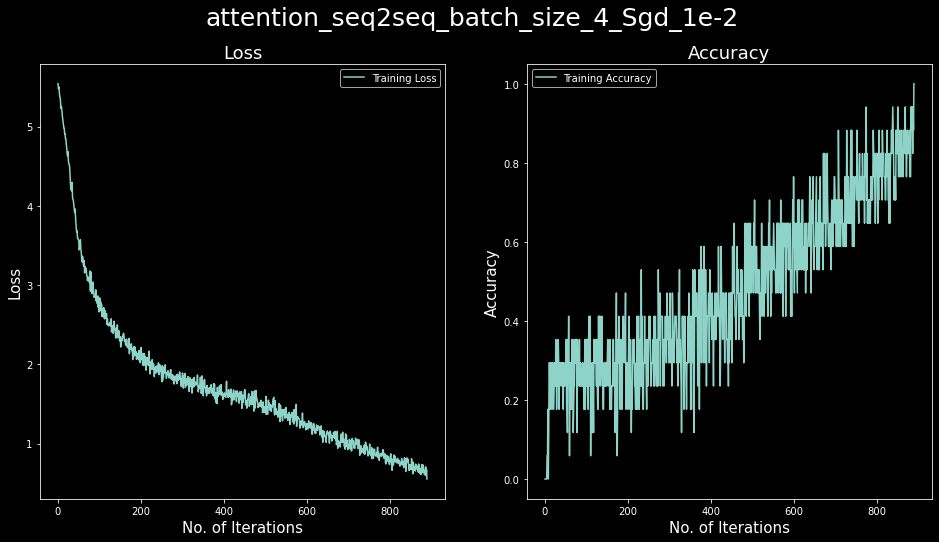

In [7]:
overfit_small_batch_testing(vocab_dict,max_sample_file,model_dict,
                            title_suffix = 'attention_seq2seq_batch_size_4_Sgd_1e-2',
                            iterations = 3000)

In [8]:
vocab_dict = {'src_corpus_file' : source_corpus_file,
              'tgt_corpus_file' : target_corpus_file,
              'src_vocab_size': 256, 
              'tgt_vocab_size' :256
             }

model_dict = {'type' : "simple_seq2seq",
              'embed_size':64,
              'hidden_size':64,
              'lr':1e-2
             }
file_dict = {"train": repeat_sample_file,
             "val" : max_sample_file ,
             "test": max_sample_file
            }

In [9]:
model,log = train(vocab_dict,file_dict, model_dict, 4, storage_path,2,print_every = 2,check_every = 4,save = False)



Running epoch 1


Iteration 0, loss = 5.5248,training accuracy = 0.0
Iteration 0, validation loss = 5.5801,validation accuracy = 0.0
Iteration 2, loss = 5.577,training accuracy = 0.0
Iteration 4, loss = 5.6052,training accuracy = 0.0
Iteration 4, validation loss = 5.5465,validation accuracy = 0.0
Iteration 6, loss = 5.5374,training accuracy = 0.0
Iteration 8, loss = 5.5253,training accuracy = 0.0
Iteration 8, validation loss = 5.5081,validation accuracy = 0.0


Running epoch 2


Iteration 0, loss = 5.4431,training accuracy = 0.0
Iteration 0, validation loss = 5.4914,validation accuracy = 0.0
Iteration 2, loss = 5.5198,training accuracy = 0.0
Iteration 4, loss = 5.5075,training accuracy = 0.0
Iteration 4, validation loss = 5.4576,validation accuracy = 0.0
Iteration 6, loss = 5.4457,training accuracy = 0.0
Iteration 8, loss = 5.4341,training accuracy = 0.0312
Iteration 8, validation loss = 5.419,validation accuracy = 0.1074


In [10]:
vocab_dict = {'src_corpus_file' : source_corpus_file,
              'tgt_corpus_file' : target_corpus_file,
              'src_vocab_size': 256, 
              'tgt_vocab_size' :256
             }

model_dict = {'type' : "attention_seq2seq",
              'embed_size':64,
              'hidden_size':64,
              'lr':1e-2,
              'dropout_rate':0.2
             }
file_dict = {"train": repeat_sample_file,
             "val" : max_sample_file ,
             "test": max_sample_file
            }

In [11]:
model,log = train(vocab_dict,file_dict, model_dict, 4, storage_path,2,print_every = 2,check_every = 4,save = False)



Running epoch 1


Iteration 0, loss = 5.5818,training accuracy = 0.0
Iteration 0, validation loss = 5.5477,validation accuracy = 0.0
Iteration 2, loss = 5.4885,training accuracy = 0.0
Iteration 4, loss = 5.4793,training accuracy = 0.0
Iteration 4, validation loss = 5.4654,validation accuracy = 0.0
Iteration 6, loss = 5.4766,training accuracy = 0.0
Iteration 8, loss = 5.416,training accuracy = 0.0312
Iteration 8, validation loss = 5.3141,validation accuracy = 0.0784


Running epoch 2


Iteration 0, loss = 5.4827,training accuracy = 0.0
Iteration 0, validation loss = 5.2706,validation accuracy = 0.0929
Iteration 2, loss = 5.3698,training accuracy = 0.0526
Iteration 4, loss = 5.1665,training accuracy = 0.1304
Iteration 4, validation loss = 5.191,validation accuracy = 0.1372
Iteration 6, loss = 5.1296,training accuracy = 0.1034
Iteration 8, loss = 5.0681,training accuracy = 0.1875
Iteration 8, validation loss = 5.0583,validation accuracy = 0.1321
